In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Species'] = data.target

df = df[df['Species'] != 0][['sepal length (cm)','sepal width (cm)','Species']]
df.sample(5)

,sepal length (cm),sepal width (cm),Species
73,6.1,2.8,1
109,7.2,3.6,2
116,6.5,3.0,2
126,6.2,2.8,2
149,5.9,3.0,2


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

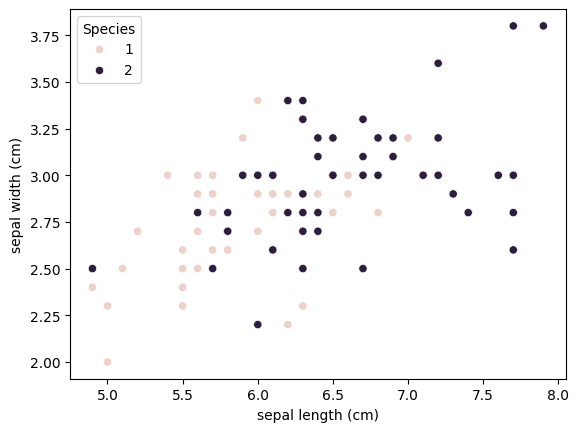

In [3]:
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='Species')

# Trying out each model individually

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

clf = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=3)
svc = SVC()
rfc = RandomForestClassifier()

# estimators = [('clf', clf), ('dt', dt), ('svc', svc), ('rfc', rfc)]
estimators = [('clf', clf), ('dt', dt), ('rfc', rfc)]

X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values


from sklearn.model_selection import cross_val_score

for estimator in estimators:
    cv_score = np.mean(cross_val_score(estimator[1], X, y, scoring='accuracy', cv=10))
    print(f'{estimator[0]} : {cv_score}')

clf : 0.75
dt : 0.72
rfc : 0.6100000000000001


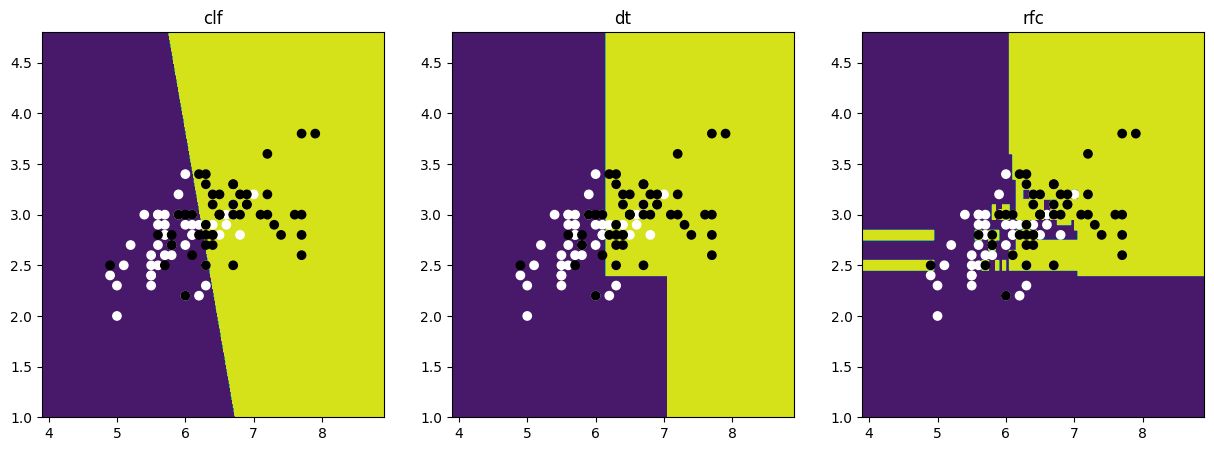

In [5]:
x_ = np.linspace(min(X[:,0])-1, max(X[:,0])+1, 500)
y_ = np.linspace(min(X[:,1])-1, max(X[:,1])+1, 500)
XX, YY = np.meshgrid(x_, y_)
    
XY_plot = np.concatenate((XX.reshape(-1,1), YY.reshape(-1,1)), axis=1)   

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

for i in range(len(estimators)):
    model = estimators[i][1]
    model.fit(X, y)
    Z = model.predict(XY_plot).reshape(XX.shape)
    
    ax[i].contourf(XX, YY, Z)
    ax[i].scatter(X[:,0], X[:,1], c=y, cmap='binary')
    ax[i].set_title(estimators[i][0])

# Using Voting Ensemble Classifier

In [6]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=estimators, voting='hard')    # voting='hard' (default)
print(np.mean(cross_val_score(vc, X, y, scoring='accuracy', cv=10)))

0.7300000000000001


In [7]:
# Soft Voting

vc = VotingClassifier(estimators=estimators, voting='soft')
print(np.mean(cross_val_score(vc, X, y, scoring='accuracy', cv=10)))

0.65


In [8]:
vc.fit(X, y)    # without fitting before we cannot access the parameters
vc.estimators_   

[LogisticRegression(),
 DecisionTreeClassifier(max_depth=3),
 RandomForestClassifier()]

Text(0.5, 1.0, 'Voting Ensemble Model')

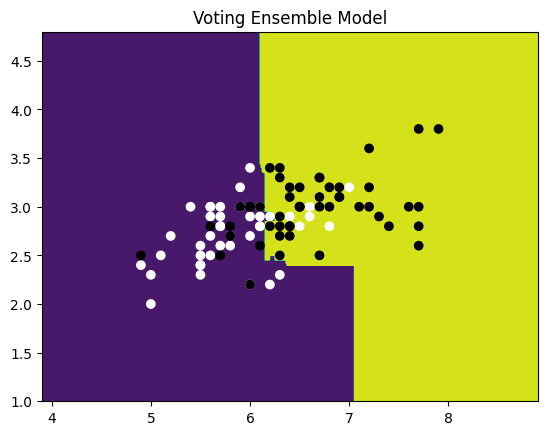

In [9]:
vc = VotingClassifier(estimators=estimators, voting='hard')

vc.fit(X, y)
Z = vc.predict(XY_plot).reshape(XX.shape)
    
plt.contourf(XX, YY, Z)
plt.scatter(X[:,0], X[:,1], c=y, cmap='binary')
plt.title('Voting Ensemble Model')

# Weighted Voting

In [10]:
max_acc = 0
best_weights = None

for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimators, weights=[i,j,k])
            acc = np.round(np.mean(cross_val_score(vc, X, y, cv=10, scoring='accuracy')), 2)
            print(f'For {i},{j},{k} : {acc}')

            if acc > max_acc:
                max_acc = acc
                best_weights = (i,j,k)

print(f'Max Accuracy : {max_acc}, Weights : {best_weights}')

For 1,1,1 : 0.73
For 1,1,2 : 0.69
For 1,1,3 : 0.6
For 1,2,1 : 0.72
For 1,2,2 : 0.73
For 1,2,3 : 0.68
For 1,3,1 : 0.73
For 1,3,2 : 0.72
For 1,3,3 : 0.72
For 2,1,1 : 0.75
For 2,1,2 : 0.73
For 2,1,3 : 0.67
For 2,2,1 : 0.73
For 2,2,2 : 0.73
For 2,2,3 : 0.72
For 2,3,1 : 0.73
For 2,3,2 : 0.73
For 2,3,3 : 0.73
For 3,1,1 : 0.75
For 3,1,2 : 0.75
For 3,1,3 : 0.73
For 3,2,1 : 0.75
For 3,2,2 : 0.73
For 3,2,3 : 0.73
For 3,3,1 : 0.73
For 3,3,2 : 0.73
For 3,3,3 : 0.73
Max Accuracy : 0.75, Weights : (2, 1, 1)


#### We can see that since model 1 (clf) gives best result, having higher weight on model 1 also gives better results in the ensemble

Text(0.5, 1.0, 'Voting Ensemble Model')

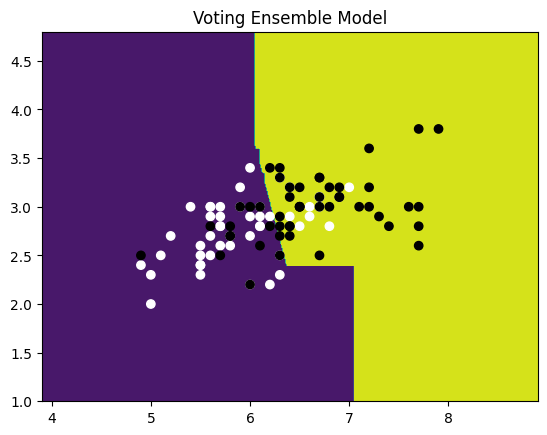

In [11]:
vc = VotingClassifier(estimators=estimators, voting='hard', weights=(2,1,1))

vc.fit(X, y)
Z = vc.predict(XY_plot).reshape(XX.shape)
    
plt.contourf(XX, YY, Z)
plt.scatter(X[:,0], X[:,1], c=y, cmap='binary')
plt.title('Voting Ensemble Model')

# Same Algorithm with Different parameters

In [12]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

estimators = [('svm1', svm1), ('svm2', svm2), ('svm3', svm3), ('svm4', svm4), ('svm5', svm5)]

for estimator in estimators:
    x = cross_val_score(estimator[1], X, y, cv=10, scoring='accuracy')
    print(estimator[0], np.round(np.mean(x), 2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [13]:
# combining all models

vc = VotingClassifier(estimators=estimators)
print(np.mean(cross_val_score(vc, X, y, cv=10, scoring='accuracy')))

0.913
